# Cinestats: Movie Data Analytics Project

**Cinestats** is a data analytics project focused on analyzing and extracting insights from movie-related data. The dataset includes various details about popular movies, such as ratings, genres, release dates, and more. The goal of this project is to explore data cleaning techniques, apply statistical methods, and visualize relationships in the data.

This project was initiated because of a deep interest in movies and a desire to enhance data analytics skills through real-world applications. The aim is to provide meaningful insights into trends in the movie industry, including popular genres, top-rated movies, and the correlation between movie popularity and user ratings.

## Key Objectives:
- Data cleaning and preprocessing
- Exploratory data analysis (EDA) and data visualization
- Identifying trends and relationships in movie data
- Visualize data

### Collect Data

In [ ]:
import requests
import csv
import time

# API Key and URL
api_key = 'API_KEY'
base_url = 'https://api.themoviedb.org/3/movie/popular'
csv_file_path = 'movies_data.csv'

# Define CSV fieldnames based on the full set of fields
fieldnames = [
    "adult", "backdrop_path", "genre_ids", "id", "original_language", "original_title", 
    "overview", "popularity", "poster_path", "release_date", "title", "video", 
    "vote_average", "vote_count"
]

# Initialize the CSV file
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    # Loop through pages 1 to 500
    for page in range(1, 501):
        url = f'{base_url}?api_key={api_key}&language=en-US&page={page}'
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            movies = data.get("results", [])

            # Write each movie's data into the CSV
            for movie in movies:
                writer.writerow({
                    "adult": movie.get("adult", ""),
                    "backdrop_path": movie.get("backdrop_path", ""),
                    "genre_ids": movie.get("genre_ids", ""),
                    "id": movie.get("id", ""),
                    "original_language": movie.get("original_language", ""),
                    "original_title": movie.get("original_title", ""),
                    "overview": movie.get("overview", ""),
                    "popularity": movie.get("popularity", ""),
                    "poster_path": movie.get("poster_path", ""),
                    "release_date": movie.get("release_date", ""),
                    "title": movie.get("title", ""),
                    "video": movie.get("video", ""),
                    "vote_average": movie.get("vote_average", ""),
                    "vote_count": movie.get("vote_count", "")
                })
        else:
            print(f"Failed to fetch data for page {page}. Status code: {response.status_code}")
            break

print(f"Data has been saved to {csv_file_path}")

Data has been saved to movies_data.csv


### EDA (Exploratory Data Analysis)

In [157]:
import pandas as pd

# Import csv file
df = pd.read_csv("/Users/khunfloat/Documents/cinestats/movies_data.csv")

df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/tElnmtQ6yz1PjN1kePNl8yMSb59.jpg,"[16, 12, 10751, 35]",1241982,en,Moana 2,After receiving an unexpected call from her wa...,6947.740,/yh64qw9mgXBvlaWDi7Q9tpUBAvH.jpg,2024-11-27,Moana 2,False,7.041,256
1,False,/3V4kLQg0kSqPLctI5ziYWabAZYF.jpg,"[878, 28, 12]",912649,en,Venom: The Last Dance,Eddie and Venom are on the run. Hunted by both...,3207.406,/aosm8NMQ3UyoBVpSxyimorCQykC.jpg,2024-10-22,Venom: The Last Dance,False,6.427,976
2,False,/6lE2e6j8qbtQR8aHxQNJlwxdmKV.jpg,"[28, 80, 53]",974453,en,Absolution,An aging ex-boxer gangster working as muscle f...,1575.362,/cNtAslrDhk1i3IOZ16vF7df6lMy.jpg,2024-10-31,Absolution,False,6.000,91
3,False,/iR79ciqhtaZ9BE7YFA1HpCHQgX4.jpg,"[27, 9648]",1100782,en,Smile 2,"About to embark on a new world tour, global po...",1399.358,/ht8Uv9QPv9y7K0RvUyJIaXOZTfd.jpg,2024-10-16,Smile 2,False,6.600,802
4,False,/mQZJoIhTEkNhCYAqcHrQqhENLdu.jpg,"[16, 878, 10751]",1184918,en,The Wild Robot,"After a shipwreck, an intelligent robot called...",1499.226,/wTnV3PCVW5O92JMrFvvrRcV39RU.jpg,2024-09-12,The Wild Robot,False,8.400,3268


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              10000 non-null  bool   
 1   backdrop_path      9756 non-null   object 
 2   genre_ids          10000 non-null  object 
 3   id                 10000 non-null  int64  
 4   original_language  10000 non-null  object 
 5   original_title     10000 non-null  object 
 6   overview           9907 non-null   object 
 7   popularity         10000 non-null  float64
 8   poster_path        9958 non-null   object 
 9   release_date       9967 non-null   object 
 10  title              10000 non-null  object 
 11  video              10000 non-null  bool   
 12  vote_average       10000 non-null  float64
 13  vote_count         10000 non-null  int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 957.2+ KB


### Cleaning Data

In [159]:
# Check that is some data null
df.isnull().sum()

adult                  0
backdrop_path        244
genre_ids              0
id                     0
original_language      0
original_title         0
overview              93
popularity             0
poster_path           42
release_date          33
title                  0
video                  0
vote_average           0
vote_count             0
dtype: int64

In [160]:
df.drop("backdrop_path", axis=1, inplace=True)
df.drop("video", axis=1, inplace=True)
df.drop("original_title", axis=1, inplace=True)

df = df[df['vote_count'] != 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9667 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              9667 non-null   bool   
 1   genre_ids          9667 non-null   object 
 2   id                 9667 non-null   int64  
 3   original_language  9667 non-null   object 
 4   overview           9633 non-null   object 
 5   popularity         9667 non-null   float64
 6   poster_path        9667 non-null   object 
 7   release_date       9666 non-null   object 
 8   title              9667 non-null   object 
 9   vote_average       9667 non-null   float64
 10  vote_count         9667 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 840.2+ KB


In [161]:
import ast

dd = df.copy()

dd['genre_ids'] = dd['genre_ids'].apply(lambda x: [int(i) for i in ast.literal_eval(x)])

# สร้าง columns แยกตาม index ของ genre_ids
genres_expanded = dd['genre_ids'].apply(pd.Series)
dd = pd.concat([df, genres_expanded], axis=1)
dd.rename(columns=lambda x: f'genre_{x}' if isinstance(x, int) else x, inplace=True)

dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9667 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              9667 non-null   bool   
 1   genre_ids          9667 non-null   object 
 2   id                 9667 non-null   int64  
 3   original_language  9667 non-null   object 
 4   overview           9633 non-null   object 
 5   popularity         9667 non-null   float64
 6   poster_path        9667 non-null   object 
 7   release_date       9666 non-null   object 
 8   title              9667 non-null   object 
 9   vote_average       9667 non-null   float64
 10  vote_count         9667 non-null   int64  
 11  genre_0            9650 non-null   float64
 12  genre_1            8166 non-null   float64
 13  genre_2            5122 non-null   float64
 14  genre_3            1660 non-null   float64
 15  genre_4            424 non-null    float64
 16  genre_5            78 non-nul

In [162]:
dd.head()

,adult,genre_ids,id,original_language,overview,popularity,poster_path,release_date,title,vote_average,vote_count,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,False,"[16, 12, 10751, 35]",1241982,en,After receiving an unexpected call from her wa...,6947.740,/yh64qw9mgXBvlaWDi7Q9tpUBAvH.jpg,2024-11-27,Moana 2,7.041,256,16.0,12.0,10751.0,35.0,NaN,NaN,NaN,NaN
1,False,"[878, 28, 12]",912649,en,Eddie and Venom are on the run. Hunted by both...,3207.406,/aosm8NMQ3UyoBVpSxyimorCQykC.jpg,2024-10-22,Venom: The Last Dance,6.427,976,878.0,28.0,12.0,NaN,NaN,NaN,NaN,NaN
2,False,"[28, 80, 53]",974453,en,An aging ex-boxer gangster working as muscle f...,1575.362,/cNtAslrDhk1i3IOZ16vF7df6lMy.jpg,2024-10-31,Absolution,6.000,91,28.0,80.0,53.0,NaN,NaN,NaN,NaN,NaN
3,False,"[27, 9648]",1100782,en,"About to embark on a new world tour, global po...",1399.358,/ht8Uv9QPv9y7K0RvUyJIaXOZTfd.jpg,2024-10-16,Smile 2,6.600,802,27.0,9648.0,NaN,NaN,NaN,NaN,NaN,NaN
4,False,"[16, 878, 10751]",1184918,en,"After a shipwreck, an intelligent robot called...",1499.226,/wTnV3PCVW5O92JMrFvvrRcV39RU.jpg,2024-09-12,The Wild Robot,8.400,3268,16.0,878.0,10751.0,NaN,NaN,NaN,NaN,NaN


### Data Analysis

#### Coorelation between popularity and vote_average

I found that the correlation between popularity and vote_average is 0.0552, which is very weak.

In [202]:
correlation = dd['popularity'].corr(dd['vote_average'])

correlation

np.float64(0.05524758945416765)

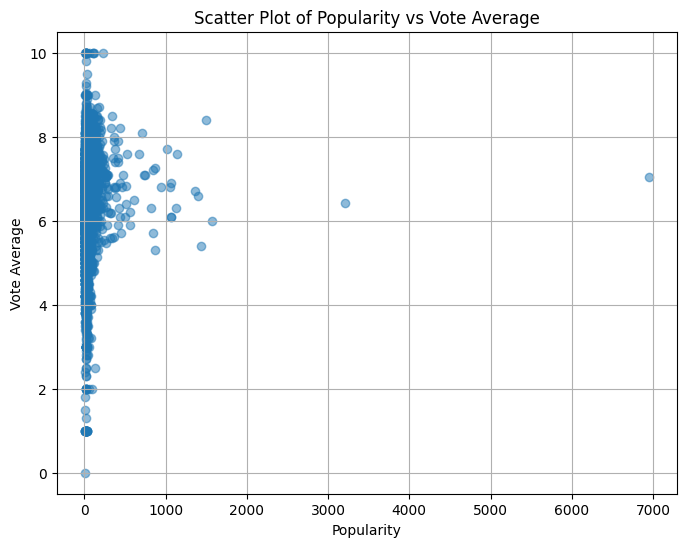

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(dd['popularity'], dd['vote_average'], alpha=0.5)
plt.title('Scatter Plot of Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

I saw that there're many movies that have vote_count around 0. I decide to investigate this factor.

#### vote count

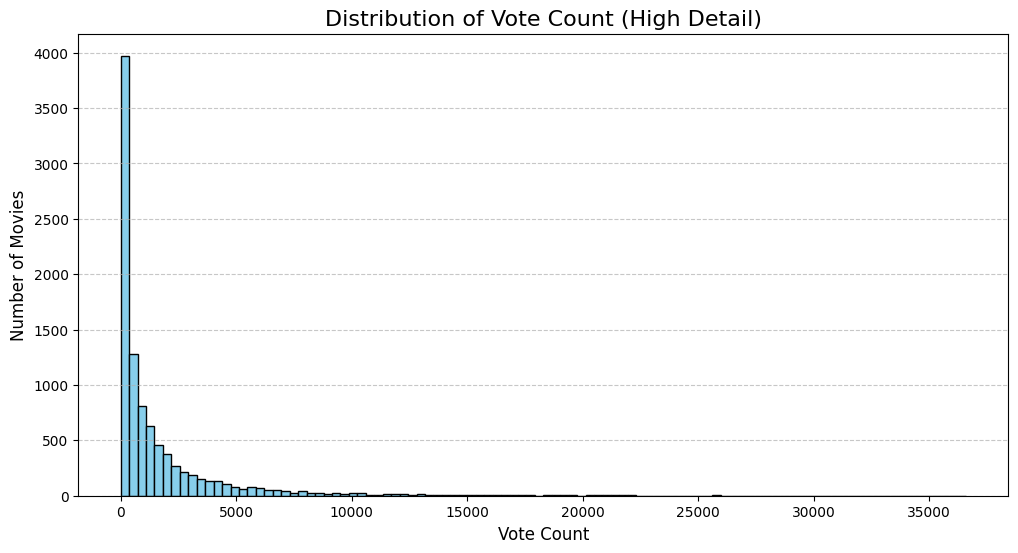

In [181]:
import matplotlib.pyplot as plt

# สร้างกราฟ Histogram
plt.figure(figsize=(12, 6))
plt.hist(dd['vote_count'], bins=100, color='skyblue', edgecolor='black')  # เพิ่ม bins ให้ละเอียดขึ้น
plt.title('Distribution of Vote Count (High Detail)', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

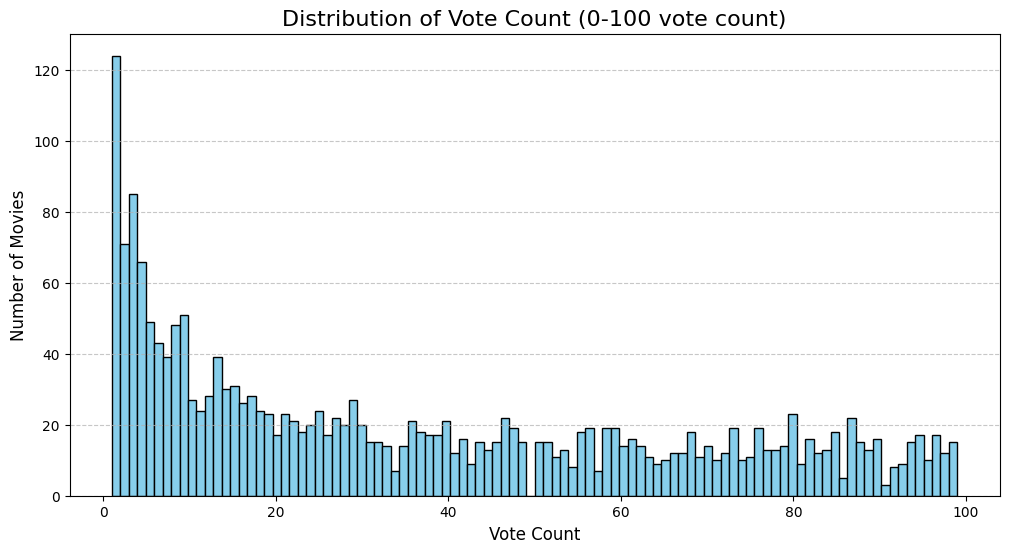

In [184]:
import matplotlib.pyplot as plt

f_dd = dd[dd["vote_count"] < 100]

# สร้างกราฟ Histogram
plt.figure(figsize=(12, 6))
plt.hist(f_dd['vote_count'], bins=100, color='skyblue', edgecolor='black')  # เพิ่ม bins ให้ละเอียดขึ้น
plt.title('Distribution of Vote Count (0-100 vote count)', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [186]:
# สรุปสถิติของ vote_count
summary = dd['vote_count'].describe()

# แสดงผล
print(summary)

count     9667.000000
mean      1781.566774
std       3221.555771
min          1.000000
25%        134.000000
50%        592.000000
75%       1906.500000
max      36601.000000
Name: vote_count, dtype: float64


I'm trying to filter out the outlier of vote_count with IQR method

In [191]:
Q1 = df['vote_count'].quantile(0.25)  # 25th percentile
Q3 = df['vote_count'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1, Q3, IQR)
print(lower_bound, upper_bound)


filtered_df = dd[(dd['vote_count'] >= lower_bound) & (dd['vote_count'] <= upper_bound)]

134.0 1906.5 1772.5
-2524.75 4565.25


In [188]:
# สรุปสถิติของ vote_count
summary = filtered_df['vote_count'].describe()

# แสดงผล
print(summary)

count    8675.000000
mean      908.901326
std      1077.532709
min         1.000000
25%       109.000000
50%       456.000000
75%      1348.000000
max      4561.000000
Name: vote_count, dtype: float64


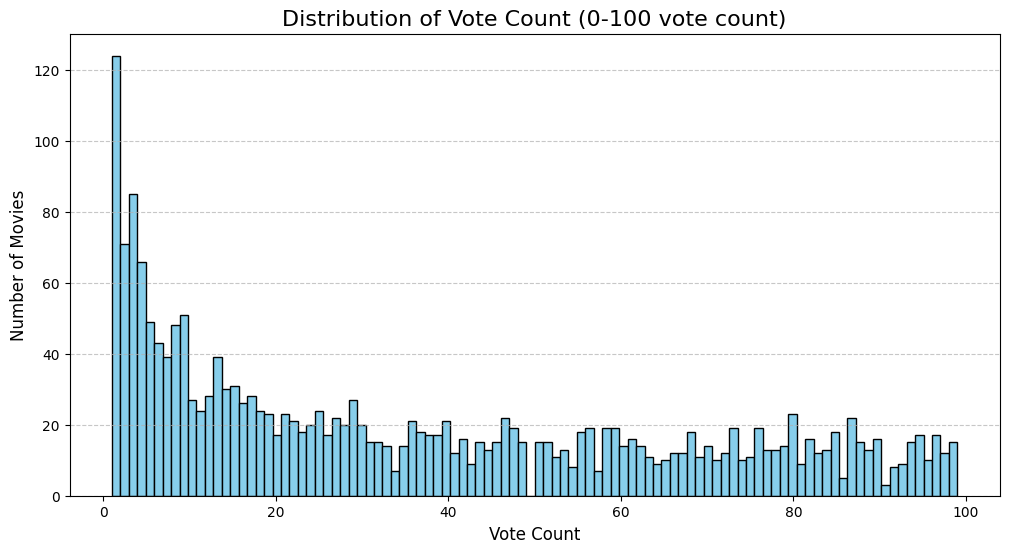

In [189]:
import matplotlib.pyplot as plt

f_dd = filtered_df[filtered_df["vote_count"] < 100]

# สร้างกราฟ Histogram
plt.figure(figsize=(12, 6))
plt.hist(f_dd['vote_count'], bins=100, color='skyblue', edgecolor='black')  # เพิ่ม bins ให้ละเอียดขึ้น
plt.title('Distribution of Vote Count (0-100 vote count)', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

IQR Method for this situation may be not work because this data doesn't distribute like normal distribution. Therefore, We I will try to use another medthod to filter the outliers out.

Then, I choose the alternative one which is Modified Z-Score Method

In [213]:
data = dd['vote_count']

# คำนวณ Median
median = data.median()

# คำนวณ MAD (Median Absolute Deviation)
mad = (data - median).abs().median()

# คำนวณ Modified Z-Score
modified_z_scores = 0.6745 * (data - median) / mad

# กำหนดค่าที่ถือว่าเป็น outliers
outliers = modified_z_scores.abs() > 3.5

# ลบ outliers
df_no_outliers = dd[~outliers]

df_no_outliers["vote_count"].describe()


count    8258.000000
mean      753.953015
std       845.464040
min         1.000000
25%       101.000000
50%       402.500000
75%      1165.000000
max      3422.000000
Name: vote_count, dtype: float64

In [214]:
df_no_outliers[df_no_outliers["vote_count"] == 1]["vote_count"].count()

np.int64(124)

Most movies have a vote_count of 1. After attempting to remove outliers using the IQR method, vote_count = 1 remained because the lower boundary was -2524.75. Then, I tried using the Modified Z-score, which references the median, to remove outliers with a threshold of Z=3.5. However, the vote_count = 1 values still persisted. This suggests that vote_count is unreliable, as a single vote can skew the vote_average, making it an invalid feature for analysis. Therefore, I recommend excluding vote_count from further analysis due to its low reliability.